# 创建图形
创建一个没有结点和边的空图形
根据定义，Graph是一组节点（顶点）和已识别的节点对（称为边、链接等）的集合。在NetworkX中，节点可以是任何hashable对象，例如文本字符串、图像、XML对象、另一个图形、自定义节点对象等。
注：python的None对象不允许用作节点。

In [2]:
import networkx as nx
G = nx.Graph()

# 节点
图标G可以通过几种方式生长。NetworkX包括许多graph generator functions和facilities to read and write graphs in many formats。

In [3]:
G.add_node(1)  # 一次添加一个节点

In [4]:
G.add_nodes_from([2, 3])  # 从任何iterable容器，如列表

如果容器产生2个元组形式，还可以添加节点和节点属性(node, node_attribute_dict)

In [5]:
G.add_nodes_from(
    [
        (4, {"color": "red", "size": 10}),
        (5, {"color": "green"})
    ]
)

一个图中的节点可以合并到另一个图中：

In [6]:
H = nx.path_graph(10)
G.add_nodes_from(H)

一个图做另一个的节点

In [7]:
G.add_node(H)

# 边

In [8]:
G.add_edge(1, 2)  # 一次添加一条边

In [9]:
e = (2, 3)
G.add_edge(*e)  # unpack tuple

In [10]:
G.add_edges_from([(1, 2), (1, 3)])  # 一次添加多条边

In [11]:
G.add_edges_from(H.edges)  # 从其他图中添加边

In [12]:
G.add_edge(1000, 10000)  # 当添加的边包含不存在的节点时，程序不会报错，会自动添加节点

添加新的节点/边时，NetworkX会自动忽略已经存在的节点/边

In [13]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3, 'm')

# 检查图中的元素

In [14]:
G.number_of_nodes()  # 查看图中节点个数

18

In [15]:
G.number_of_edges()  # 查看图中边条数

12

## 查看图中节点/边的邻接信息

In [16]:
DG = nx.DiGraph()
DG.add_edge(2, 1)
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

## 查看图的节点和边
四个基本图形属性：G.nodes, G.edges, G.adj, G.degree，分别对应图中节点、边、邻接节点和度。
它们类似于字典，可以使用.items(), .data()。

In [17]:
list(G.nodes)

[1,
 2,
 3,
 4,
 5,
 0,
 6,
 7,
 8,
 9,
 1000,
 10000,
 'spam',
 's',
 'p',
 'a',
 'm']

In [18]:
list(G.edges)

[(1, 2),
 (1, 3),
 (1, 0),
 (2, 3),
 (3, 4),
 (3, 'm'),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (1000, 10000)]

In [19]:
list(G.adj[1])  # 节点1的邻接节点

[2, 3, 0]

In [20]:
G.degree[1]  # 节点1的度

3

In [21]:
G.edges([2, 'm'])  # 查看某些节点的边

EdgeDataView([(2, 1), (2, 3), ('m', 3)])

In [22]:
G.degree([2, 3])  # 查看某些节点的度

DegreeView({2: 2, 3: 4})

# 从图形中删除元素
可以用与添加类似的方式从图形中删除节点和边。使用方法：Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge(), Graph.remove_edges_from()

In [23]:
G.remove_node(2)

In [24]:
G.remove_nodes_from("spam")

In [25]:
list(G.nodes)

[1,
 3,
 4,
 5,
 0,
 6,
 7,
 8,
 9,
 1000,
 10000,
 'spam']

In [26]:
G.remove_edge(1, 3)

# 使用图形构造函数
图形对象不必以增量方式构建——指定图形结构的数据可以直接传递给各种图形类的构造函数。当通过实例化一个图形类来创建一个图结构时，可以用几种格式指定数据。

In [30]:
G.add_edge(1, 2)

In [31]:
H = nx.DiGraph(G)  # create a DiGraph using the connections from G

In [32]:
list(H.edges())

[(1, 0),
 (1, 2),
 (3, 4),
 (4, 3),
 (4, 5),
 (5, 4),
 (5, 6),
 (0, 1),
 (6, 5),
 (6, 7),
 (7, 6),
 (7, 8),
 (8, 7),
 (8, 9),
 (9, 8),
 (1000, 10000),
 (10000, 1000),
 (2, 1)]

In [34]:
edgelist = [(0, 1), (1, 2), (2, 3)]

In [35]:
H = nx.Graph(edgelist)  # create a graph from an edge list

In [36]:
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [37]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2:(0, 1)}

In [38]:
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs

In [39]:
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

# 访问边缘和邻居
除了试图Graph.edges和Graph.adj，还可以使用下标表示法访问边和邻居。

In [40]:
G = nx.Graph([(1, 2, {"color": "yellow"})])

In [41]:
G[1]

AtlasView({2: {'color': 'yellow'}})

In [47]:
G[2]

AtlasView({1: {'color': 'yellow'}})

In [42]:
G[1][2]

{'color': 'yellow'}

In [43]:
G.edges[1, 2]

{'color': 'yellow'}

In [44]:
list(G.edges)

[(1, 2)]

In [45]:
list(G.nodes)

[1, 2]

如果边已经存在，可以使用下标表示法获取/设置边的属性。

In [48]:
G.add_edge(1, 3)

In [49]:
G[1][3]['color'] = "blue"

In [50]:
G.edges[1, 2]["color"] = "red"

In [51]:
G.edges[1, 2]

{'color': 'red'}

使用G.adjacency()或G.adj.items()。注意：对于无向图，邻接迭代可以看到每个边两次

In [52]:
FG = nx.Graph()

In [53]:
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [54]:
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr["weight"]
        if wt < 0.5:
            print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


使用边缘属性可以方便地访问所有边缘。

In [57]:
for (u, v, wt) in FG.edges.data("weight"):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


# 给图形、节点和边添加属性
诸如权重、标签、颜色或任何您喜欢的python对象等属性都可以附加到图形、节点或边上。
每个图、节点和边都可以在关联的属性字典中保存键/值属性对（键必须是可哈希的）。默认情况下，这些属性为空，但可以使用add_edge, add_node或直接操作命名的属性字典G.graph, G.nodes和G.edges

## 图形属性
创建新图形时分配图形属性

In [58]:
G = nx.Graph(day="Friday")

In [59]:
G.graph

{'day': 'Friday'}

或者你可以稍后修改属性

In [60]:
G.graph['day'] = "Monday"

In [61]:
G.graph

{'day': 'Monday'}

## 节点属性
使用添加节点属性add_node(), add_nodes_from() 或 G.nodes

In [62]:
G.add_node(1, time='5pm')

In [63]:
G.add_nodes_from([3], time='2pm')

In [64]:
G.nodes[1]

{'time': '5pm'}

In [65]:
G.nodes[1]["room"] = 714

In [66]:
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

注意：将节点添加到G.nodes不将其添加到图中，使用G.add_node()添加新节点。

## 边缘属性
使用添加/更改边缘属性add_edge(), add_edges_from()或下表符号。

In [67]:
G.add_edge(1, 2, weight=4.7)

In [68]:
G.add_edges_from([(3, 4), (4, 5)], color='red')

In [69]:
G.add_edges_from([(1, 2, {"color": "blue"}), (2, 3, {"weight": 8})])

In [70]:
G[1][2]["weight"] = 4.7

In [71]:
G.edges[3, 4]["weight"] = 4.2

In [73]:
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

# 有向图
这个DiGraph类提供特定于有向边的附加方法和属性，例如，DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors, DiGraph.successors等。
为了允许算法轻松地处理这两个类，neighbors相当于successors而当degree报告的总和in_degree和out_degree，尽管这有时可能会让人感觉不一致。

In [74]:
DG = nx.DiGraph()

In [75]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [76]:
DG.out_degree(1, weight="weight")

0.5

In [77]:
DG.degree(1, weight="weight")

1.25

In [78]:
list(DG.successors(1))

[2]

In [79]:
list(DG.neighbors(1))

[2]

有些算法只适用于有向图，而另一些算法不适用于有向图。实际上，将有向图和无向图集中在一起的趋势是危险的。如果要将有向图视为某些度量的无向图，则应该使用Graph.to_undirected()或与

In [80]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

# 多重图
NetworkX为允许任意节点对之间存在多个边的图形提供类。这个MultiGraph和MultiDiGraph类允许你两次添加相同的边缘，可能使用不同的边缘数据。
这对某些应用程序来说可能很强大，但许多算法在此类图上没有很好的定义。如果结果定义明确，例如：MultiGraph.degree()我们提供功能。
否则，你应该以一种使测量定义良好的方式转换为标准图。

In [81]:
MG = nx.MultiGraph()

In [82]:
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

In [83]:
dict(MG.degree(weight="weight"))

{1: 1.25, 2: 1.75, 3: 0.5}

In [84]:
GG = nx.Graph()

In [85]:
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d["weight"] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)

In [86]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# 图形生成器和图形操作
除了逐节点或逐边构造图外，还可以通过

## 1.应用经典的图形操作，例如：
---|:--:
subgraph(G, nbunch)|返回在nbunch中的节点上诱导的子图。
union(G, H[, rename, name])|返回图g和h的并集。
disjoint_union(G, H)|返回图G和图H的不相交的并集。
cartesian_product(G, H)|返回g和h的笛卡尔积。
compose(G, H)|返回由h组成的g的新图。
complement(G)|返回g的图补。
create_empty_copy(G[, with_data])|返回图形G的副本，并删除所有边。
to_undirected(graph)|返回图表的无向视图graph。
to_directed(graph)|返回图形的定向视图 graph。

## 2.使用对经典小图形之一的调用，例如
---|:--:
petersen_graph([create_using])|返回彼得森图。
tutte_graph([create_using])|返回图特图。
sedgewick_maze_graph([create_using])|返回一个带有循环的小迷宫。
tetrahedral_graph([create_using])|返回3正则柏拉图四面体图形。



## 3.使用经典图形的(构造性)生成器，例如
---|:--:
complete_graph(n[, create_using])|返回完整图形 K_n 具有n个节点。
complete_bipartite_graph(n1, n2[, create_using])|返回完整的二部图 K_{{n_1,n_2}}
barbell_graph(m1, m2[, create_using])|返回杠铃图：由路径连接的两个完整图。
lollipop_graph(m, n[, create_using])|返回棒棒糖图； K_m 连接到 P_n

像这样

In [92]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

## 4.使用随机图形生成器，例如
---|:--:
erdos_renyi_graph(n, p[, seed, directed])|返回一个Gn,p随机图，也称为Erdős-Rényi图或二叉图。
watts_strogatz_graph(n, k, p[, seed])|返回Watts–Strogaz小世界图。
barabasi_albert_graph(n, m[, seed, ...])|返回使用Barabási-Albert优先附件的随机图
random_lobster(n, p1, p2[, seed])|返回随机龙虾图。

像这样

In [93]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

## 5.使用常用图形格式读取存储在文件中的图形
etworkX支持许多流行的格式，如边缘列表、邻接列表、GML、GraphML、PICLE、LEDA等。

In [95]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

# 分析图形

In [96]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [97]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [98]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

一些具有大输出的函数迭代（节点、值）2元组。这些很容易存储在dict结构，如果你愿意的话。

In [99]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

# 图形绘制
NetworkX主要不是一个图形绘制包，但包括了Matplotlib的基本绘制以及使用开源Graphviz软件包的接口。
这些都是networkx.drawing模块，并将在可能的情况下导入。
首先导入Matplotlib的绘制接口（Pylab也可以工作）

In [100]:
import matplotlib.pyplot as plt

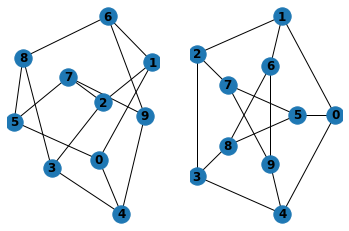

In [101]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight="bold")
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight="bold")

当绘制到交互显示时。请注意，你可能需要发布matplotlib

In [102]:
plt.show()

如果你没有在交互模式下使用matplotlib，请使用命令。

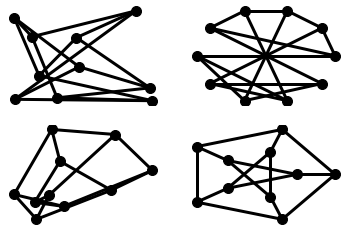

In [103]:
options = {
    "node_color": "black",
    "node_size": 100,
    "width": 3
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], **options)

你可以通过以下方式找到其他选项draw_networkx()和布局通过layout module。你可以将多个外壳与draw_shell()。

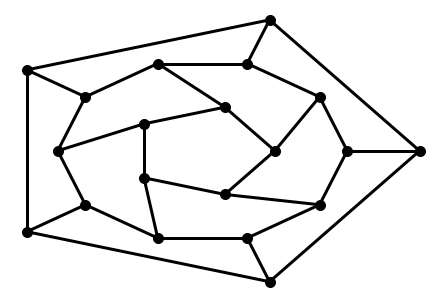

In [104]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

要将图形保存到文件中，请使用

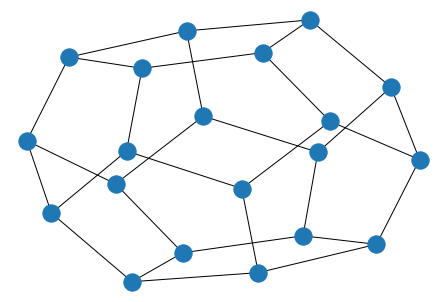

In [105]:
nx.draw(G)
plt.savefig("path.png")

此函数用于写入文件path.png在本地目录中。如果你的系统上有Graphviz和PyGraphviz或PYDot，你还可以使用networkx.drawing.nx_agraph.graphviz_layout或networkx.drawing.nx_pydot.graphviz_layout以获取节点位置，或以点格式写出图形以供进一步处理。

In [106]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, "file.dot")

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')